In [0]:
import numpy as np
import pandas as pd


In [0]:
df = pd.read_csv('/content/all_data.csv')

In [4]:
df[['product_id','product_name','product_ati','pre_define_cat']]

,product_id,product_name,product_ati,pre_define_cat
0,Model: M92P,Refurbished Lenovo THINKCENTRE M92P-SFF Deskto...,Do as much as you like with this Lenovo THINKC...,desktop
1,Model: 790,Refurbished Dell Optiplex 790-SFF WA1-0309 Des...,Certified Refurbished Items: \n \n What to Ex...,desktop
2,Model: 8200 Elite,HP 8200 Elite Desktop Computer with Windows 10...,This HP desktop computer is very fast and depe...,desktop
3,Model: ME086LL/A,"Apple iMac 21.5"" 2.7GHz Core i5 (ME086LL/A) Al...","The iMac ""Core i5"" 2.7 21.5-Inch Aluminum (Lat...",desktop
4,Model: K_00180,Refurbished - Dell Optiplex Desktop Computer 3...,Refurbished - Dell Optiplex Desktop Computer 3...,desktop
...,...,...,...,...
13886,NaN,"VIZIO SmartCast E-Series E55u-D2 55"" 4K Ultra ...",Coverage for product breakdowns and malfunctio...,tv
13887,NaN,"Samsung UN75RU8000 75"" RU8000 LED Smart 4K UHD...","E3SAMUN75RU8000 \n \n Samsung RU8000 75"" Cl...",tv
13888,Walmart # 572101210,DummyStressTest1294Automation generated BV title,NaN,tv
13889,NaN,LED TV USB Backlight Kit Computer RGB LED Ligh...,Product Description FEATURES: \nCreate special...,tv


**USE Embeddings**

In [0]:
%%capture
# Install the latest Tensorflow version.
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

In [6]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [0]:
#Drop all products with missing product ati
df.dropna(subset=['product_ati'],inplace=True)

In [0]:
product_ati = df['product_ati']
product_ati_ls = product_ati.tolist()

In [0]:
b = embed(product_ati_ls)

In [0]:
b = b.numpy()
df1 = pd.DataFrame(b)

In [11]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,-0.016969,-0.060940,-0.035904,0.048267,0.049002,0.045782,-0.001480,0.055519,-0.036057,-0.048150,-0.038340,-0.015797,-0.057845,-0.061026,0.057378,0.061307,-0.051204,0.029636,0.039864,-0.023877,0.024675,-0.054474,0.060472,0.022941,0.035379,0.024138,0.053940,-0.052451,0.028146,-0.012146,0.026523,0.051609,-0.041773,-0.042943,-0.046573,-0.013028,0.060627,0.058851,-0.041456,0.009997,...,0.061278,0.039241,0.050797,0.008645,-0.030611,-0.029967,0.017492,-0.061300,0.053259,0.055409,-0.059635,-0.059206,0.017606,0.037526,-0.059131,0.059926,0.014947,0.060223,0.038481,-0.029850,-0.007384,0.018508,-0.050791,-0.018089,-0.029773,-0.028602,-0.052325,0.049716,0.022800,-0.059813,0.002899,-0.061313,-0.050087,-0.030808,-0.057470,-0.012963,0.053401,0.022248,-0.045814,0.020286
1,-0.041484,-0.061370,-0.006091,0.041825,0.015729,0.041593,0.009070,0.057960,-0.032886,-0.048090,-0.020899,-0.030124,-0.054567,-0.057457,0.060604,0.061511,-0.040752,0.025212,0.053999,-0.014320,0.049246,-0.056989,0.060668,0.017903,0.049161,-0.028360,-0.024928,0.002782,0.006627,-0.026418,0.041506,0.058761,-0.020125,-0.045956,-0.020060,0.007279,0.060355,0.031688,-0.013871,-0.037074,...,0.060260,-0.036560,0.026444,-0.047718,-0.039409,-0.017495,0.055012,-0.061514,0.016791,0.027752,-0.055938,-0.061497,-0.020180,-0.034343,-0.058320,0.059682,-0.027032,0.056083,0.053629,-0.031843,0.001474,0.050183,-0.026640,0.046787,0.013397,-0.052068,-0.058872,0.059956,-0.014340,-0.054689,-0.041145,-0.061517,0.028884,-0.036949,-0.060962,-0.014162,0.059974,0.044401,-0.058291,0.052975
2,-0.023556,-0.059633,-0.043533,0.010029,0.003900,0.041879,0.057367,-0.009167,0.041946,-0.058730,-0.036848,-0.055233,-0.052175,-0.062709,0.014917,0.069058,-0.054333,-0.022891,-0.034071,-0.035351,0.057719,-0.068229,0.048502,-0.046502,0.065577,-0.038043,0.007632,-0.016494,0.014260,-0.035085,-0.043197,0.048827,-0.062854,-0.048835,0.060659,0.025756,0.054762,-0.044466,-0.011060,0.035402,...,0.068649,-0.064683,-0.038406,0.021250,0.002349,-0.057463,0.053768,-0.069060,-0.064244,-0.036178,0.022917,-0.040873,0.055813,0.027031,-0.059988,0.060132,-0.057147,0.055618,0.036010,-0.059367,-0.035633,-0.042041,-0.047161,-0.026005,-0.018137,0.000335,0.052176,0.064008,-0.054992,-0.064888,0.036871,-0.055471,-0.036496,-0.041922,0.060082,0.005801,0.002114,-0.011274,-0.035317,0.026435
3,-0.016245,-0.035316,-0.035526,0.019120,0.030151,-0.043219,0.055471,0.053324,0.051332,-0.058816,-0.054993,-0.019224,-0.057558,-0.035076,-0.058069,0.060742,-0.059081,0.003689,-0.049025,-0.059761,-0.048742,-0.051224,0.052456,0.007722,0.060024,0.045314,0.060537,-0.051154,0.003001,0.028825,0.019742,0.004836,-0.047731,-0.002332,0.059766,0.043378,-0.032852,0.058040,-0.035274,-0.056194,...,0.060362,-0.054290,0.025256,0.044468,0.052676,-0.040308,0.049837,-0.060745,-0.006041,0.023721,-0.059473,-0.059778,0.048304,0.054145,0.005376,0.023504,-0.046892,0.038681,0.049214,0.008118,0.027348,-0.060159,-0.057893,-0.048835,-0.022665,-0.032095,-0.021850,0.059258,-0.055005,0.048696,0.039164,-0.060742,-0.056449,-0.032459,0.058234,0.003381,0.055342,0.053248,-0.059517,0.029574
4,-0.056081,-0.055577,-0.053868,0.057947,0.043795,0.037581,0.049691,0.055957,-0.004685,-0.054410,-0.040309,-0.052243,-0.057423,-0.057791,0.026680,0.059081,0.012640,-0.012799,0.032282,-0.018653,0.043621,-0.057748,0.048360,-0.058638,0.059020,0.043766,-0.030471,0.041035,0.056350,0.022462,0.056545,0.048141,-0.056174,-0.053141,0.051193,0.008777,0.051072,-0.012840,-0.049418,-0.017065,...,0.059071,-0.053377,-0.010879,0.039270,0.007938,-0.055424,0.054130,-0.059081,-0.020014,0.055511,-0.050572,-0.059079,0.055112,-0.026801,-0.046245,0.058246,0.022072,0.042104,0.039863,-0.020570,-0.045086,-0.012470,-0.049100,0.052177,-0.019296,-0.018758,0.003579,0.056667,-0

In [0]:
df1['type']= df['pre_define_cat']

In [0]:
df_desktop = df1[df1['type']== 'desktop']

In [0]:
df_desktop_1 = df_desktop.loc[:,df_desktop.columns != 'type']

**PCA**

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  
sc = StandardScaler() 

def PCArun(df,testdata,x):
  # Creating train and test set
  X_train, X_test, y_train, y_test = train_test_split(df, testdata, test_size = 0.2, random_state = 0) 

  #Fitting model  
  X_train = sc.fit_transform(X_train) 
  X_test = sc.transform(X_test) 

  # Applying PCA function on training for 80% variance 
  pca = PCA(x) 
  
  X_train = pca.fit_transform(X_train) 
  X_test = pca.transform(X_test)  
  explained_variance = pca.explained_variance_ratio_ 
  return X_train, X_test,y_train,y_test,explained_variance



In [0]:
X_train, X_test,y_train,y_test, explained_variance = PCArun(df_desktop_1,df_desktop['type'],0.3)

In [17]:
X_train.shape

(792, 4)

**DB Scan**

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

db_score = []

for i in np.arange(0.01,1,0.01):
    dbscan = DBSCAN(eps=i, min_samples = 2)
    clusters = dbscan.fit_predict(df_desktop_1)
    a = metrics.davies_bouldin_score(df_desktop_1, clusters)
    print(a)
    db_score.append(a)


1.0505394963332462
1.0505394963332462
1.0227951420443806
1.0227951420443806
1.1035603510186929
1.1107690426553916
1.1068125569324792
1.1118478915445997
1.1209371766566807
1.1250835713832905
1.142658555108935
1.1446665571913055
1.151405855308843
1.162657700210064
1.1621536247961757
1.1618137002142792
1.1691456064169135
1.1840466479977316
1.1827781753881057
1.201420781009607
1.220727913886753
1.2338121372726865
1.2368246174488011
1.2436375735753709
1.2503109649899575
1.2543894695470086
1.2614045945761836
1.2637128758401823
1.2749627325129695
1.274915017793487
1.274601283157046
1.2741361485900327
1.2809965023432397
1.2894179659119624
1.2944770487097497
1.296999363939016
1.3016299723559694
1.3029182559156176
1.3054473029656513
1.3202778986714905
1.3294593197070883
1.3402087081989724
1.3525251530083129
1.3705096716349396
1.3771995764015483
1.3899994575579206
1.3964651335367302
1.3956985252224436
1.4028988990014786
1.4352884429892387
1.4581028897648922
1.4631151646975502
1.4698490537797901
1

In [56]:

db = pd.DataFrame(db_score,np.arange(0.01,1,0.01))
db = db.reset_index()
db
db.columns=['Score','eps_val']
db.sort_values(by='eps_val')[1:20]

,Score,eps_val
3,0.04,1.022795
0,0.01,1.050539
1,0.02,1.050539
4,0.05,1.103560
6,0.07,1.106813
5,0.06,1.110769
7,0.08,1.111848
8,0.09,1.120937
9,0.10,1.125084
10,0.11,1.142659


Best Value for eps - 0.04

Now we iterate over minimum samples

In [60]:
dbscan = DBSCAN(eps=0.34, min_samples = 4)
clusters = dbscan.fit_predict(df_desktop_1)
metrics.davies_bouldin_score(df_desktop_1, clusters)



1.4247842816218421

Text(0.5, 1.0, 'DBSCAN')

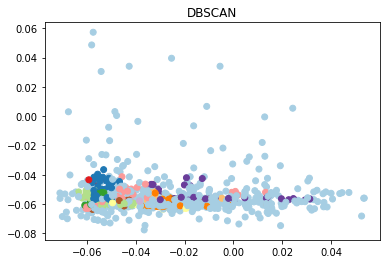

In [61]:
plt.scatter(df_desktop_1[:][0], df_desktop_1[:][1],c=clusters, cmap='Paired')
plt.title("DBSCAN")